In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [2]:
#DATA PREPARATION (divided by 100 for data normalisation)
Data = [[[(i+j)/1000] for i in range(7)] for j in range(100)]
target = [(i+7)/1000 for i in range(100)]

In [3]:
#PREVIEW DATA
print(Data[0])
print(target[0])

[[0.0], [0.001], [0.002], [0.003], [0.004], [0.005], [0.006]]
0.007


In [4]:
x_train, x_test, y_train, y_test = train_test_split(Data,target,test_size=0.2,random_state=4)

In [5]:
#RNN MODEL
model = Sequential()
model.add(LSTM((1),batch_input_shape=(None,7,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
3/3 [==============================] - 1s 271ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_los

Epoch 56/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 57/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 58/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 59/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 60/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 61/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 62/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - v

In [7]:
results = (model.predict(x_test))
print(results)

[[0.02690789]
 [0.0157973 ]
 [0.09998571]
 [0.02249846]
 [0.07092482]
 [0.03126868]
 [0.06128241]
 [0.10079939]
 [0.04922014]
 [0.05531691]
 [0.05126676]
 [0.00671087]
 [0.09916813]
 [0.03343027]
 [0.0191606 ]
 [0.04508455]
 [0.0202761 ]
 [0.03664856]
 [0.04299589]
 [0.06226368]]


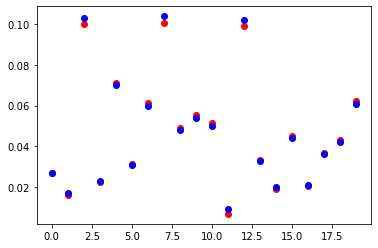

In [8]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='b')
plt.show()

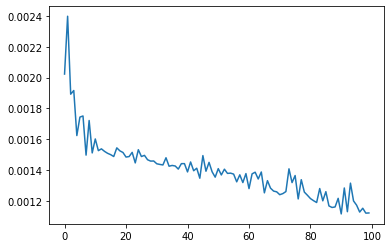

In [9]:
plt.plot(history.history['loss'])
plt.show()